# Machine Learning - Linear Regression

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import fetch_california_housing

## Dummy Data

In [2]:
# define input features
X = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
# define target variable
y = np.array([5, 20, 14, 32, 22, 38])

print(X)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


## Define Model

In [3]:
# define model
model = LinearRegression()

In [4]:
model

LinearRegression()

## Train Model

In [5]:
# train model
model.fit(X, y)

LinearRegression()

## Test Model

In [6]:
test_data = np.array([5, 35, 40, 55]).reshape((-1, 1))
print(test_data)

[[ 5]
 [35]
 [40]
 [55]]


In [8]:
print(y)

[ 5 20 14 32 22 38]


In [9]:
model.predict(X)

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

## Evaluate Model

In [11]:
prediction = model.predict(X)
mse = mean_squared_error(y, prediction)

print("MSE:", mse)

MSE: 33.75555555555555


Model representation:

$y = a_0 + a_1x_1$

In [12]:
# model representation
print("intercept:", model.intercept_)
print("slope:", model.coef_)

intercept: 5.633333333333329
slope: [0.54]


Model representation:

$y = a_0 + a_1x_1$

atau

$y = \text{intercept} + \text{slope}\cdot x$

In [15]:
# model
inputs = X[1]
pred = model.intercept_ + np.dot(model.coef_, [inputs])
print(pred)

[13.73333333]


## Visualize Data & Model

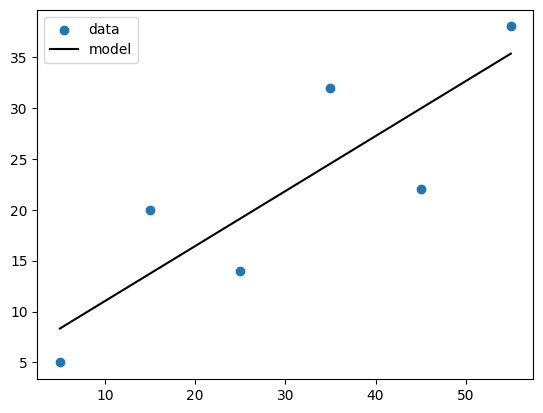

In [18]:
plt.scatter(X, y, label="data")
plt.plot(X, prediction, label="model", color="black")
plt.legend()
plt.show()

## Multiple Linear Regression

In [19]:
X = np.array([
    [0, 1], [5, 1], [15, 2], [25, 5],
    [35, 11], [45, 15], [55, 34], [60, 35]
])
y = np.array([4, 5, 20, 14, 32, 22, 38, 43])

print(X)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


In [22]:
# define model
model = LinearRegression()

# train model
model.fit(X, y)

print("Bias:", model.intercept_)
print("Weights:", model.coef_)

# predict
y_pred = model.predict(X)
print(y_pred)

# evaluate
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)

Bias: 5.52257927519819
Weights: [0.44706965 0.25502548]
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
MSE: 25.561871814835797


In [23]:
# model representation
bias = model.intercept_
weight_1 = model.coef_[0]
weight_2 = model.coef_[1]

inputs = [60, 35]
pred = bias + weight_1*inputs[0] + weight_2*inputs[1]
print(f"prediction for {inputs}: {pred}")

prediction for [60, 35]: 41.27265005662514


## Polynomial Regression

X: [[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
y: [15 11  2  8 25 32]


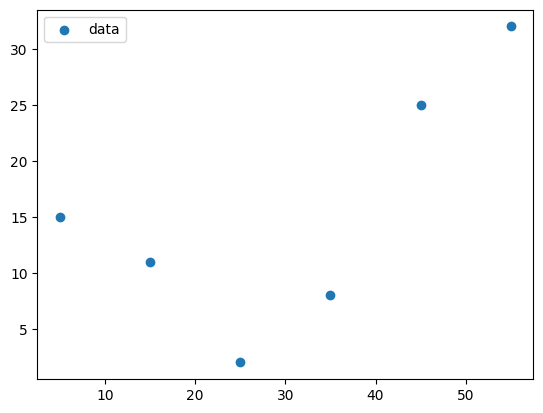

In [26]:
X = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

print("X:", X)
print("y:", y)

plt.scatter(X, y, label="data")
plt.legend()
plt.show()

In [27]:
# define polynomial features
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(X)

PolynomialFeatures(include_bias=False)

In [30]:
polynomial_X = transformer.transform(X)
print(polynomial_X)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [34]:
# define model
model = LinearRegression()

# train model
model.fit(polynomial_X, y)

print("Bias:", model.intercept_)
print("Weights:", model.coef_)

# predict
y_pred = model.predict(polynomial_X)
print("Prediction:", y_pred)
print("Actual:", y)

# evaluate
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)

Bias: 21.37232142857144
Weights: [-1.32357143  0.02839286]
Prediction: [15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]
Actual: [15 11  2  8 25 32]
MSE: 11.305952380952384


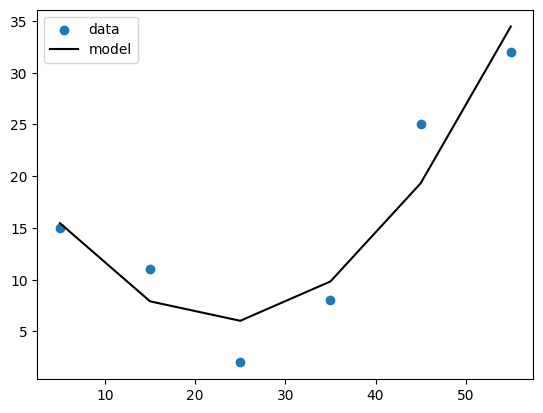

In [36]:
plt.scatter(X, y, label="data")
plt.plot(X, y_pred, label="model", color="black")
plt.legend()
plt.show()

## House Pricing Prediction

In [39]:
X, y = fetch_california_housing(data_home="data", return_X_y=True, as_frame=True)

In [40]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [41]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

### Univariate Linear Regression

In [43]:
features = X[["MedInc"]]
print(features)

       MedInc
0      8.3252
1      8.3014
2      7.2574
3      5.6431
4      3.8462
...       ...
20635  1.5603
20636  2.5568
20637  1.7000
20638  1.8672
20639  2.3886

[20640 rows x 1 columns]


In [44]:
model = LinearRegression()
model.fit(features, y)

prediction = model.predict(features)
mse = mean_squared_error(y, prediction)
print("MSE:", mse)

MSE: 0.7011311502929527


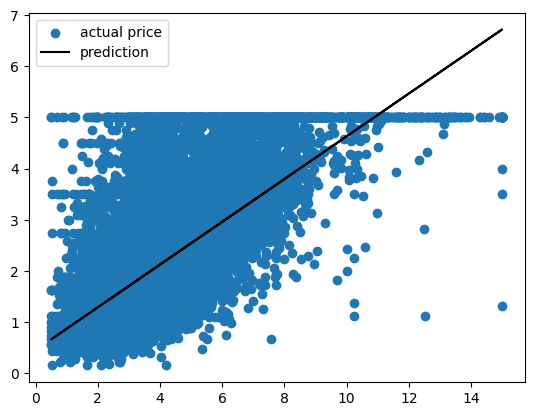

In [46]:
plt.scatter(features, y, label="actual price")
plt.plot(features, prediction, label="prediction", color="black")
plt.legend()
plt.show()

### Polynomial Regression

In [47]:
features = X[["MedInc"]]
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(features)

poly_features = transformer.transform(features)

model = LinearRegression()
model.fit(poly_features, y)

prediction = model.predict(poly_features)
mse = mean_squared_error(y, prediction)
print("MSE:", mse)

MSE: 0.695037253723973


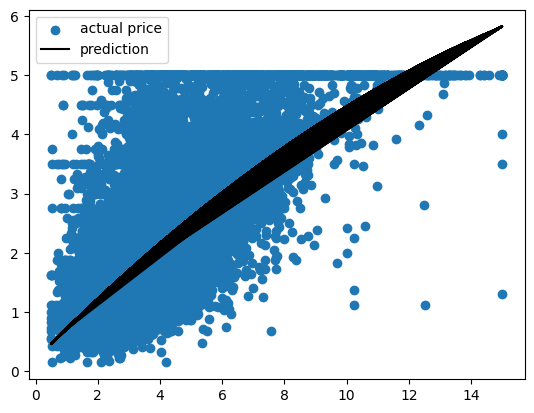

In [50]:
plt.scatter(features, y, label="actual price")
plt.plot(features, prediction, label="prediction", color="black")
plt.legend()
plt.show()

### Multivariate Linear Regression

In [52]:
model = LinearRegression()
model.fit(X, y)

prediction = model.predict(X)
mse = mean_squared_error(y, prediction)
print("MSE:", mse)

MSE: 0.5243209861846072


### Conclusion

Best model: **multivariate linear regression** with all features included